In [ ]:
import pathlib
import shutil

import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL

In [ ]:
def to_displayable(img, converted: int | None = cv2.COLOR_BGR2RGB) -> PIL.Image.Image:
    if converted is not None:
        img = cv2.cvtColor(img, converted)
    return PIL.Image.fromarray(np.clip(img.astype(np.uint8), 0, 255))


def showarray(img, converted: int | None = cv2.COLOR_BGR2RGB) -> None:
    display(to_displayable(img, converted))

In [ ]:
ref_img_paths = [
    "..\data\\raw\\uzhref\\sun9_00123.npy",
    "..\data\\raw\\uzhref\\sun2_00972.npy",
    "..\data\\raw\\uzhref\\sun2_01050.npy",
    "..\data\\raw\\uzhref\\sun5_00723.npy",
    "..\data\\raw\\uzhref\\sun9_00288.npy",
    "..\data\\raw\\uzhref\\sun5_00288.npy",
    "..\data\\raw\\uzhref\\sun2_01227.npy",
    "..\data\\excluded\\uzh\\highway1_02661.npy",
    "..\data\\excluded\\dsec\\interlaken_01_a_00039.npy",
    "..\\data\\excluded\\dsec\\interlaken_01_a_00114.npy",
    "..\\data\\excluded\\dsec\\interlaken_01_a_01389.npy",
    "..\\data\\excluded\\dsec\\interlaken_01_a_01791.npy",
    "..\\data\\excluded\\dsec\\interlaken_01_a_01638.npy",
    "..\\data\\excluded\\dsec\\interlaken_01_a_01980.npy",
    "..\\data\\excluded\\dsec\\interlaken_01_a_01311.npy",
    "..\\data\\excluded\\dsec\\interlaken_01_a_01914.npy",
]

In [ ]:
ref_images = [np.load(p)[:, :, :3] for p in ref_img_paths]

In [ ]:
target_path = pathlib.Path("..\\data\\ref")

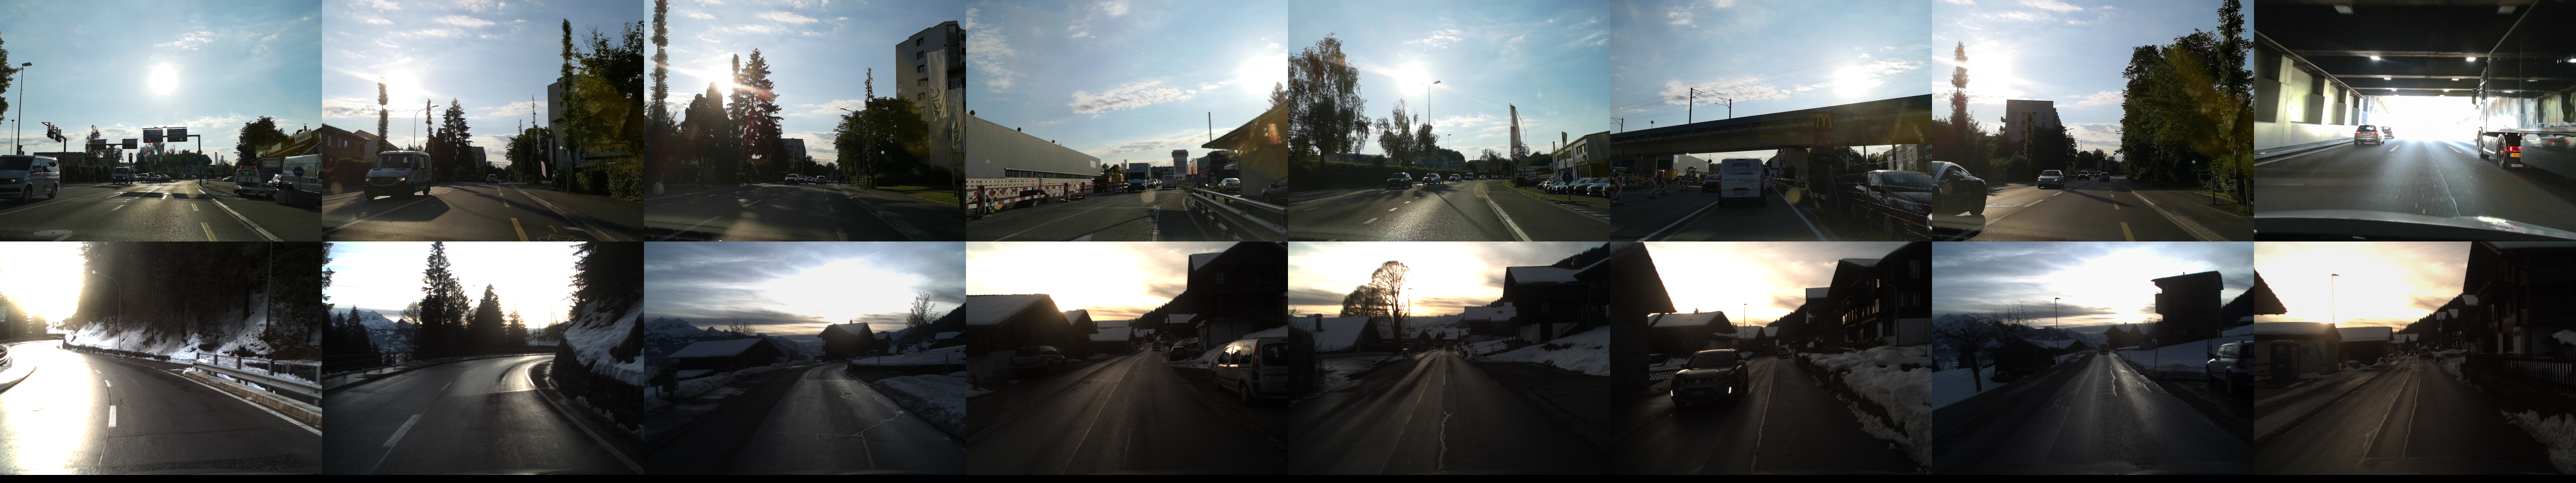

In [ ]:
rows = [
    np.concatenate(ref_images[i : i + 8], axis=1) for i in range(0, len(ref_images), 8)
]
ref_images_cat = np.concatenate(rows, axis=0)

showarray(ref_images_cat)

In [ ]:
for img_path, img in zip(ref_img_paths, ref_images):
    shutil.copy(img_path, target_path / pathlib.Path(img_path).name)

In [ ]:
dsec_ref_img_paths = list(pathlib.Path("..\\data\\excluded\\dsec").rglob("*.npy"))
len(dsec_ref_img_paths)

753